Data description:

features: array of strings, 1x11, a list of water indices to measure

location_ids: array of integer, 37x1, IDs of the water stations

X_te: array of matrices, 1x282, test set input data: water indices for 282 contiguous dates, each element is a 37x11 matrix: 37 spatial locations by 11 features

X_tr: array of matrices, 1x423, training set input data for 423 contiguous dates

Y_te: array of matrices, 37x282, test set output data: water quiality for 37 locations in 282 contiguous dates

Y_tr: array of matrices, 37x423, training set output data for 423 contiguous dates

location_group: array of cells, 1x3, the groups of water stations, each group forms a connected spatial network (i.e., water system)

In [9]:
from scipy.io import loadmat

data = loadmat('water_dataset.mat')

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X_tr', 'X_te', 'Y_tr', 'Y_te', 'location_group', 'features', 'location_ids'])


In [54]:
features = [str(feat[0]) for feat in data['features'][0]]
location_ids = [int(location[0]) for location in data['location_ids']]
X_te = data['X_te']
X_tr = data['X_tr']
Y_te = data['Y_te']
Y_tr = data['Y_tr']
location_group = [group[0].tolist() for group in data['location_group'][0]]

print("Features: ")
for feat in features:
    print("\t" + feat)
print(location_ids)
print(X_te.shape)
print(X_tr.shape)
print(Y_te.shape)
print(Y_tr.shape)
print(location_group)

Features: 
	Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Maximum)
	pH, water, unfiltered, field, standard units (Maximum)
	pH, water, unfiltered, field, standard units (Minimum)
	Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Minimum)
	Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Mean)
	Dissolved oxygen, water, unfiltered, milligrams per liter (Maximum)
	Dissolved oxygen, water, unfiltered, milligrams per liter (Mean)
	Dissolved oxygen, water, unfiltered, milligrams per liter (Minimum)
	Temperature, water, degrees Celsius (Mean)
	Temperature, water, degrees Celsius (Minimum)
	Temperature, water, degrees Celsius (Maximum)
[2198840, 2198920, 2198950, 2203603, 2203655, 2203700, 2203831, 2203863, 2203873, 2203900, 2203950, 2203960, 2204037, 2207135, 2207160, 2208450, 2208493, 2336120, 2336152, 2336240, 2336300, 2336313, 2336340, 2336360, 2336410, 233652

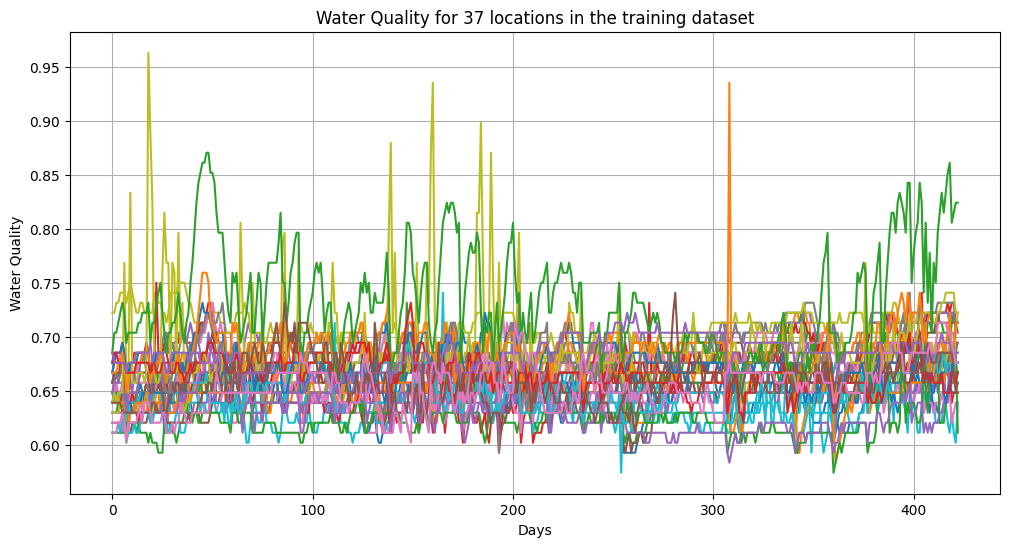

In [64]:
import matplotlib.pyplot as plt

# Get the number of locations and days
num_locations, num_days = Y_tr.shape

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each location's values over the 282 days
for i in range(num_locations):
    plt.plot(range(num_days), Y_tr[i, :], label=f'Location {i+1}')

plt.xlabel('Days')
plt.ylabel('Water Quality')
plt.title('Water Quality for 37 locations in the training dataset')
plt.grid(True)

plt.show()